In [15]:
import pandas as pd
import jieba.analyse
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.family'] = ['font.sans-serif']
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 

In [4]:
weibo_url = pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/urls/weibo6.xlsx') \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/urls/weibo0.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/urls/weibo1.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/urls/weibo2.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/urls/weibo3.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/urls/weibo4.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/urls/weibo5.xlsx'), ignore_index=True)

In [18]:
weibo_content = pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/contents/weibo6.xlsx') \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/contents/weibo0.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/contents/weibo1.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/contents/weibo2.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/contents/weibo3.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/contents/weibo4.xlsx'), ignore_index=True) \
.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/contents/weibo5.xlsx'), ignore_index=True)

In [19]:
text = ''.join(weibo_content[u'正文'].tolist())

In [5]:
def build_stopwords(stopwords_file_name):
    stopwords = []
    stopwords.append('cn')
    stopwords.append('http')
    stopwords.append('##')
    stopwords.append('...')
    stopwords.append('weibo')
    stopwords.append('client')
    stopwords.append('version')
#     stopwords.append('生命')
#     stopwords.append('微博')

    stopwords_file = open(stopwords_file_name, 'w')
    for i in stopwords:
        stopwords_file.write(i+'\n')
    #     stopwords_file.write('')
    stopwords_file.close()

stopwords_file_name = 'stopwords.txt'
build_stopwords(stopwords_file_name)

In [15]:
stopwords_file_name = 'stopwords.txt'
jieba.analyse.set_stop_words(stopwords_file_name)
tf = jieba.analyse.tfidf(text, topK=100, withWeight=True)
tr = jieba.analyse.textrank(text,topK=100, withWeight=True)

In [16]:
tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
worddata = pd.merge(tfdata, trdata, on='word')
tfdata.to_csv('tfdata.csv', index=False, encoding='utf-8')
trdata.to_csv('trdata.csv', index=False, encoding='utf-8')

In [9]:
tfdata = pd.read_csv('tfdata.csv', encoding='utf-8')
trdata = pd.read_csv('trdata.csv', encoding='utf-8')

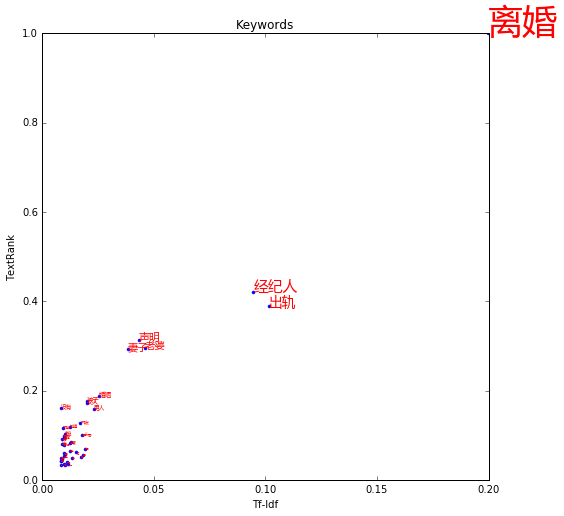

In [28]:
def keywords(txt):
    import pandas as pd
    import jieba.analyse
    from matplotlib.font_manager import FontProperties  
#     import matplotlib.pyplot as plt
#     %matplotlib inline
#     tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
#     tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
#     tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
#     trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    font = FontProperties(fname=r"/Users/zhicongchen/Downloads/msyh.ttf")
    plt.figure(figsize=(8,8))
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i],
                 fontsize = worddata.textrank[i] * 35, color = 'red', rotation = 0, fontproperties=font)
    plt.title('Keywords')
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
#     plt.xscale('log')
#     plt.yscale('log')
    plt.show()
    
keywords(text)

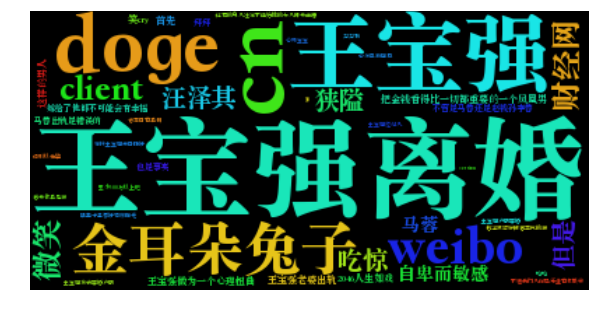

In [23]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    import random
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def wordcloudplot(txt):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    
    wordcloud = WordCloud(font_path='/Library/Fonts/Songti.ttc').generate(txt)
    
    # store to file
    #wordcloud.to_file(path.join(d, "alice.png"))

    # Open a plot of the generated image.
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
#     plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
    plt.axis("off")
    plt.show()
    
# tfidf200= jieba.analyse.extract_tags(text, topK=200, withWeight=False)
# seg_list = jieba.cut(text, cut_all=False)
# seg_list = [i for i in seg_list if i in tfidf200]
# txt200 = r' '.join(seg_list)
wordcloudplot(text) 

In [4]:
articles = pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/articles/article0.xlsx')
# articles = articles.append(pd.read_excel('/Users/zhicongchen/data/weibowangbaoqiang/articles/article1.xlsx'))
for i in range(1, 52):
    filename = '/Users/zhicongchen/data/weibowangbaoqiang/articles/article' + str(i) + '.xlsx'
#     print filename
    articles = articles.append(pd.read_excel(filename))

In [5]:
len(articles)

51847

In [6]:
len(articles[articles[u'文章类型'] == u'网媒'])

15599

In [11]:
articles.groupby(u'文章类型').count()

,序号,发布时间,标题,链接,版权来源,发布来源,正文,文章id,注册地,语义指纹
文章类型,,,,,,,,,,
APP采集,1966,1966,1966,1966,1242,1966,1966,1966,1116,1966
博客,3691,3691,3691,3691,3490,3691,3691,3691,3663,3691
平媒,39,39,39,39,39,39,39,39,39,39
微信,18869,18869,18869,18869,18865,18869,18869,18869,0,18869
微博,542,542,542,542,0,542,542,542,0,542
未知来源,1,1,1,1,0,1,1,1,1,1
网媒,15599,15599,15599,15599,3990,15599,15599,15599,13793,15599
论坛,11122,11122,11122,11122,7308,11122,11122,11122,11033,11122
问答,18,18,18,18,0,18,18,18,18,18


In [25]:
len(articles.groupby(u'发布来源').count())

1275

In [12]:
txt = ''.join(articles[u'正文'])

In [ ]:
stopwords_file_name = 'stopwords.txt'
jieba.analyse.set_stop_words(stopwords_file_name)
tf_txt = jieba.analyse.tfidf(txt, topK=50, withWeight=True)
tr_txt = jieba.analyse.textrank(txt,topK=50, withWeight=True)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/k_/smtmrnz10vdcf2rlv_6rsjvr0000gn/T/jieba.cache
Loading model cost 1.733 seconds.
Prefix dict has been built succesfully.


In [ ]:
# tfdata_txt.to_csv('tfdata_txt.csv', index=False, encoding='utf-8')
# trdata_txt.to_csv('trdata_txt.csv', index=False, encoding='utf-8')

In [ ]:
def keywords(txt):
    import pandas as pd
    import jieba.analyse
    from matplotlib.font_manager import FontProperties  
#     import matplotlib.pyplot as plt
#     %matplotlib inline
#     tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
#     tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
#     tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
#     trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    font = FontProperties(fname=r"/Users/zhicongchen/Downloads/msyh.ttf")
    plt.figure(figsize=(8,8))
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i],
                 fontsize = worddata.textrank[i] * 35, color = 'red', rotation = 0, fontproperties=font)
    plt.title('Keywords')
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
#     plt.xscale('log')
#     plt.yscale('log')
    plt.show()
    
keywords(text)

In [ ]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    import random
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def wordcloudplot(txt):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    
    wordcloud = WordCloud(font_path='/Library/Fonts/Songti.ttc').generate(txt)
    
    # store to file
    #wordcloud.to_file(path.join(d, "alice.png"))

    # Open a plot of the generated image.
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
#     plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
    plt.axis("off")
    plt.show()
    
# tfidf200= jieba.analyse.extract_tags(text, topK=200, withWeight=False)
# seg_list = jieba.cut(text, cut_all=False)
# seg_list = [i for i in seg_list if i in tfidf200]
# txt200 = r' '.join(seg_list)
wordcloudplot(text) 